<a href="https://colab.research.google.com/github/akshpatel26/Flight-Price-Analysis/blob/main/Flight_Price_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_excel('/content/Flight_Price_dataset_2.xlsx')
df

,Unnamed: 0,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,Go First,Ecomony Class,G8-334,"Sun, 23 Jan 2022",08:00:00,10:10:00,New Delhi,Mumbai,Non Stop,2h 10m,5954
1,1,Go First,Ecomony Class,G8-354,"Sun, 23 Jan 2022",22:30:00,00:40\n+ 1 day,New Delhi,Mumbai,Non Stop,2h 10m,5954
2,2,Go First,Ecomony Class,G8-2501,"Sun, 23 Jan 2022",02:00:00,04:15:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
3,3,Go First,Ecomony Class,G8-392,"Sun, 23 Jan 2022",12:45:00,15:00:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
4,4,Go First,Ecomony Class,G8-336,"Sun, 23 Jan 2022",14:20:00,16:35:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2950,Vistara Premium Economy,Premium Ecomony,UK-706/652,"Fri, 4 Feb 2022",13:40:00,21:35:00,New Delhi,Mumbai,1 Stop,7h 55m,7850
2951,2951,Vistara Premium Economy,Premium Ecomony,UK-683/656,"Fri, 4 Feb 2022",13:40:00,15:15\n+ 1 day,New Delhi,Mumbai,1 Stop,25h 35m,7882
2952,2952,Vistara Premium Economy,Premium Ecomony,UK-673/622,"Fri, 4 Feb 2022",13:20:00,18:20:00,New Delhi,Mumbai,1 Stop,5h 00m,9908
2953,2953,Vistara Premium Economy,Premium Ecomony,UK-847/842,"Fri, 4 Feb 2022",11:10:00,14:45\n+ 1 day,New Delhi,Mumbai,1 Stop,27h 35m,19539


In [12]:
print('No. of Rows :',df.shape[0])
print('No. of Columns :',df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()


No. of Rows : 2955
No. of Columns : 12


,Unnamed: 0,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,Go First,Ecomony Class,G8-334,"Sun, 23 Jan 2022",08:00:00,10:10:00,New Delhi,Mumbai,Non Stop,2h 10m,5954
1,1,Go First,Ecomony Class,G8-354,"Sun, 23 Jan 2022",22:30:00,00:40\n+ 1 day,New Delhi,Mumbai,Non Stop,2h 10m,5954
2,2,Go First,Ecomony Class,G8-2501,"Sun, 23 Jan 2022",02:00:00,04:15:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
3,3,Go First,Ecomony Class,G8-392,"Sun, 23 Jan 2022",12:45:00,15:00:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
4,4,Go First,Ecomony Class,G8-336,"Sun, 23 Jan 2022",14:20:00,16:35:00,New Delhi,Mumbai,Non Stop,2h 15m,5954


In [13]:
df.shape

(2955, 12)

In [14]:
df.columns


Index(['Unnamed: 0', 'Airline', 'Class', 'Aeroplane', 'Date', 'Departure_Time',
       'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration', 'Price'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2955 non-null   int64 
 1   Airline         2955 non-null   object
 2   Class           2955 non-null   object
 3   Aeroplane       2955 non-null   object
 4   Date            2955 non-null   object
 5   Departure_Time  2955 non-null   object
 6   Arrival_Time    2955 non-null   object
 7   Source          2955 non-null   object
 8   Destination     2955 non-null   object
 9   Stops           2955 non-null   object
 10  Duration        2955 non-null   object
 11  Price           2955 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 277.2+ KB


In [16]:
df.drop(columns='Unnamed: 0', inplace =True)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         2955 non-null   object
 1   Class           2955 non-null   object
 2   Aeroplane       2955 non-null   object
 3   Date            2955 non-null   object
 4   Departure_Time  2955 non-null   object
 5   Arrival_Time    2955 non-null   object
 6   Source          2955 non-null   object
 7   Destination     2955 non-null   object
 8   Stops           2955 non-null   object
 9   Duration        2955 non-null   object
 10  Price           2955 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 254.1+ KB


In [18]:
# lets sort columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups


{int64: ['Price'], object: ['Airline', 'Class', 'Aeroplane', 'Date', 'Departure_Time', 'Arrival_Time', 'Source', 'Destination', 'Stops', 'Duration']}

In [19]:
df.isnull().sum()

,0
Airline,0
Class,0
Aeroplane,0
Date,0
Departure_Time,0
Arrival_Time,0
Source,0
Destination,0
Stops,0
Duration,0


In [20]:
df.describe()

,Price
count,2955.000000
mean,15751.639932
std,13383.511890
min,2410.000000
25%,5955.000000
50%,9840.000000
75%,22152.000000
max,64712.000000


In [21]:
df.duplicated().sum()


0

In [22]:
df['Duration'] = df['Duration'].map(lambda x : x.replace('05m','5m'))


In [23]:
# Conversion of Duration column from hr & Minutes format to Minutes
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# convert this column into a numeric datatypes
df['Duration']= pd.to_numeric(df['Duration'])

In [26]:
# create new column for day & date
df['Day']= df['Date'].map(lambda x :x[:3])
df['Day']= df['Date'].map(lambda x :x[:3])
Categorical = ['Airline','Class','Day','Stops','Aeroplane']


In [27]:
pd.set_option('display.max_rows',None)
for i in Categorical :
    print(i)
    print(df[i].value_counts())
    print('='*100)

Airline
Airline
Vistara Premium Economy    619
Air India                  435
Vistara                    421
Air India Business         396
Vistara Business           370
Go First                   319
IndiGo                     270
SpiceJet                   125
Name: count, dtype: int64
Class
Class
Ecomony Class      1570
Business Class      766
Premium Ecomony     619
Name: count, dtype: int64
Day
Day
Wed    505
Fri    474
Tue    463
Thu    447
Sun    442
Mon    419
Sat    205
Name: count, dtype: int64
Stops
Stops
1 Stop       2007
Non Stop      886
2 Stop(s)      62
Name: count, dtype: int64
Aeroplane
Aeroplane
UK-981          39
UK-927          39
UK-985          39
UK-943          39
UK-941          39
UK-955          39
UK-871/878      39
UK-829/876      39
UK-859/876      39
UK-899/876      39
UK-829/878      39
UK-879/876      39
UK-706/652      38
UK-637/652      38
UK-933          38
UK-993          38
UK-637/654      37
UK-706/654      37
UK-879/878      35
UK-673/622      

In [28]:
df.describe(include=object).style.background_gradient(cmap='summer_r')


,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Day
count,2955,2955,2955,2955,2955,2955,2955,2955,2955,2955
unique,8,3,260,13,120,150,1,1,3,7
top,Vistara Premium Economy,Ecomony Class,UK-981,"Wed, 2 Feb 2022",07:30:00,23:00:00,New Delhi,Mumbai,1 Stop,Wed
freq,619,1570,39,274,125,156,2955,2955,2007,505


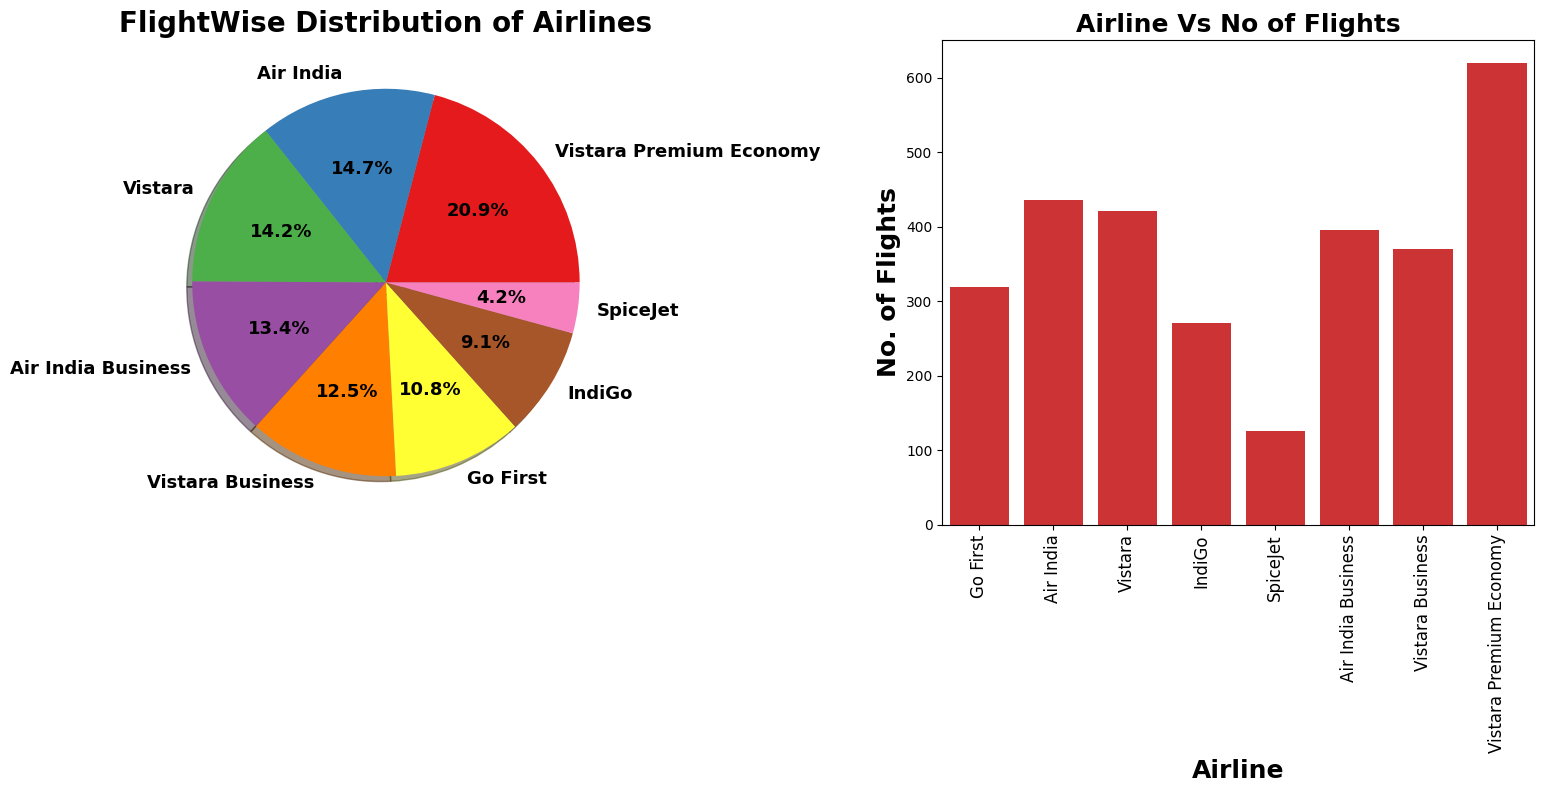

In [29]:
# Pie & count plot of Airline types
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart
df['Airline'].value_counts().plot.pie(autopct='%2.1f%%',
                                      textprops={'fontsize': 13, 'fontweight': 'bold'}, ax=ax[0], shadow=True)
ax[0].set_title('FlightWise Distribution of Airlines', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Airline', data=df, ax=ax[1])
ax[1].set_title('Airline Vs No of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Airline", fontsize=18, fontweight='bold')
ax[1].set_ylabel("No. of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, rotation=90)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


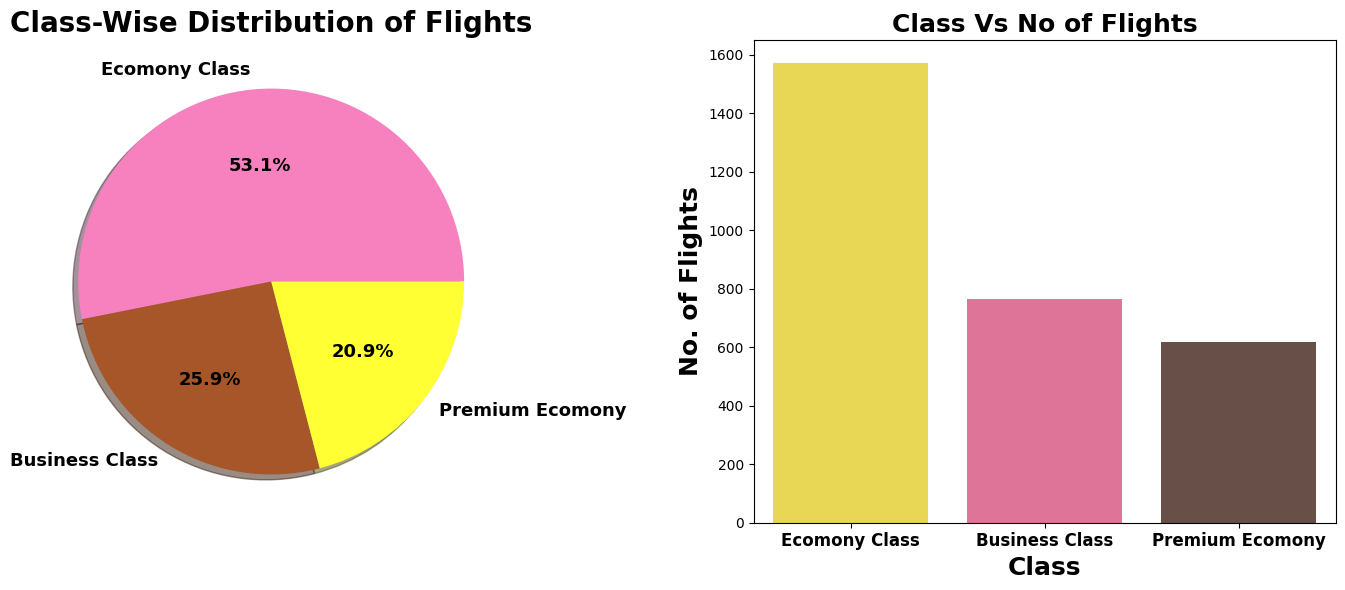

In [30]:
# Counting class type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1_r')

# Creating the subplots
f, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for Class distribution
df['Class'].value_counts().plot.pie(autopct='%2.1f%%',
                                    textprops={'fontsize': 13, 'fontweight': 'bold'}, ax=ax[0], shadow=True)
ax[0].set_title('Class-Wise Distribution of Flights', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot for Class-wise number of flights
custom_palette = ["#FFEB3B", "#F06292", "#6D4C41"]

sns.countplot(x='Class', data=df, ax=ax[1],palette=custom_palette)  # Use a color palette
ax[1].set_title('Class Vs No of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Class", fontsize=18, fontweight='bold')
ax[1].set_ylabel("No. of Flights", fontsize=18, fontweight='bold')

# Adjusting tick label
plt.xticks(fontsize=12, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


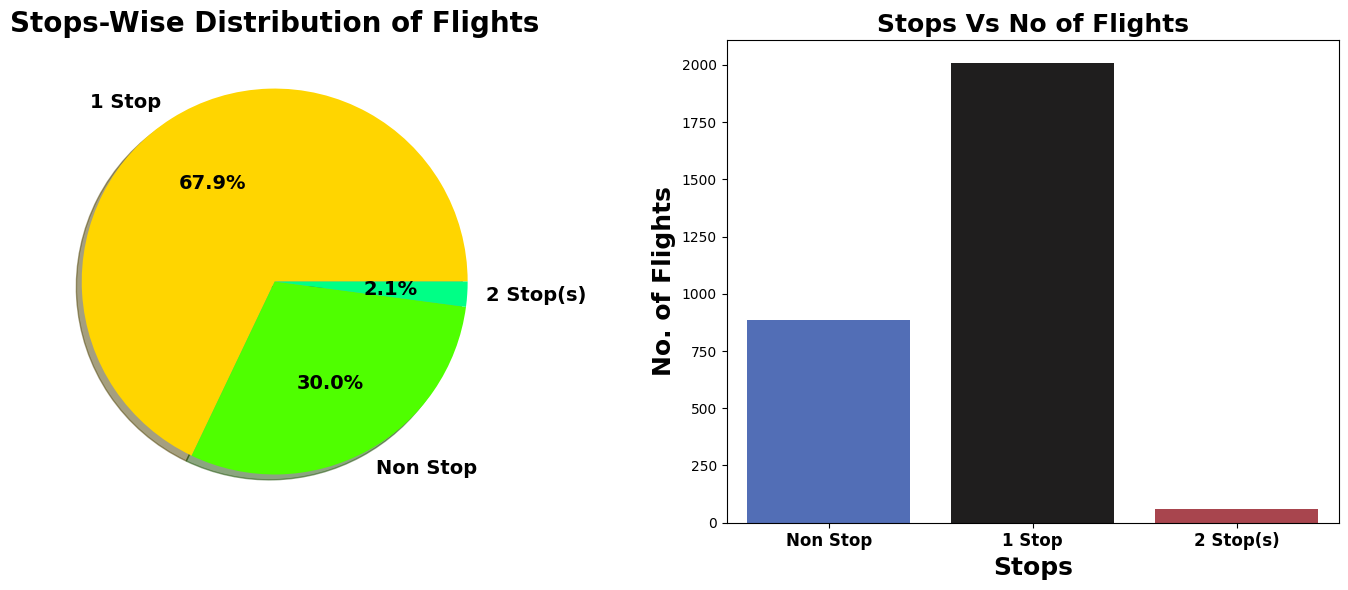

In [31]:

plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
df['Stops'].value_counts().plot.pie(autopct='%2.1f%%',
                                      textprops={'fontsize': 14, 'fontweight': 'bold'},
                                      ax=ax[0], shadow=True)
ax[0].set_title('Stops-Wise Distribution of Flights', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot
sns.countplot(x='Stops', data=df, ax=ax[1],palette="icefire")  # Use a color palette
ax[1].set_title('Stops Vs No of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Stops", fontsize=18, fontweight='bold')
ax[1].set_ylabel("No. of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


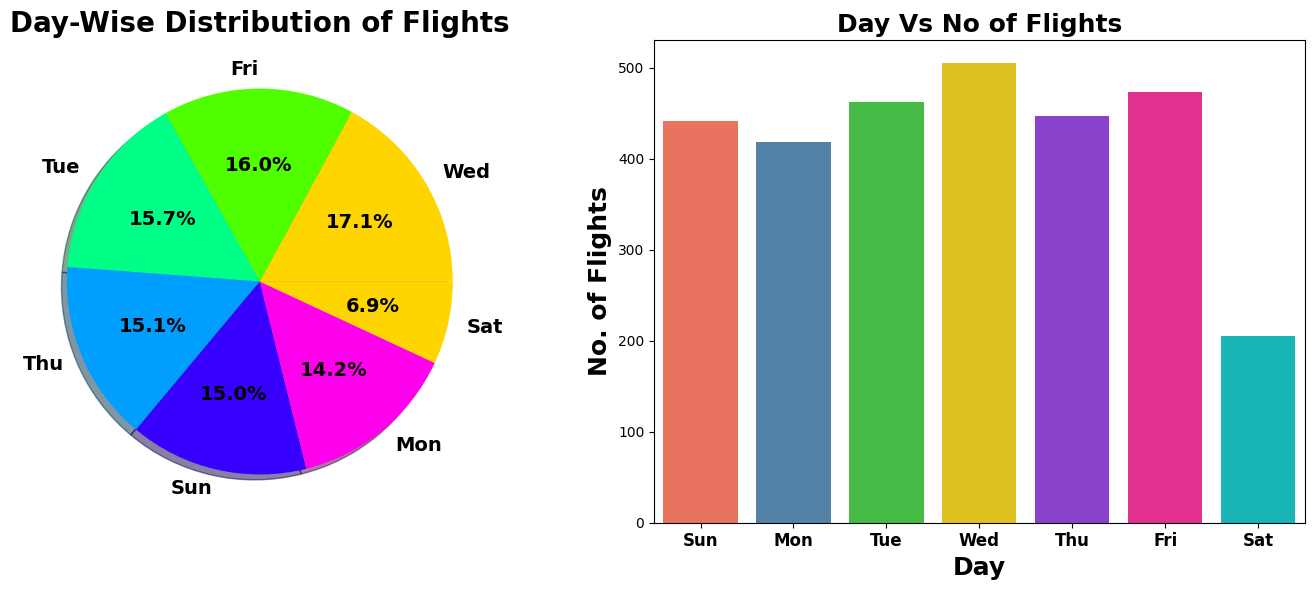

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')
f, ax = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for day-wise distribution of flights
df['Day'].value_counts().plot.pie(autopct='%2.1f%%',
                                   textprops={'fontsize': 14, 'fontweight': 'bold'},
                                   ax=ax[0], shadow=True)
ax[0].set_title('Day-Wise Distribution of Flights', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Count plot for day vs number of flights
custom_palette = ["#FF6347", "#4682B4", "#32CD32", "#FFD700", "#8A2BE2", "#FF1493", "#00CED1"]

sns.countplot(x='Day', data=df, ax=ax[1],palette=custom_palette)
ax[1].set_title('Day Vs No of Flights', fontsize=18, fontweight='bold')
ax[1].set_xlabel("Day", fontsize=18, fontweight='bold')
ax[1].set_ylabel("No. of Flights", fontsize=18, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


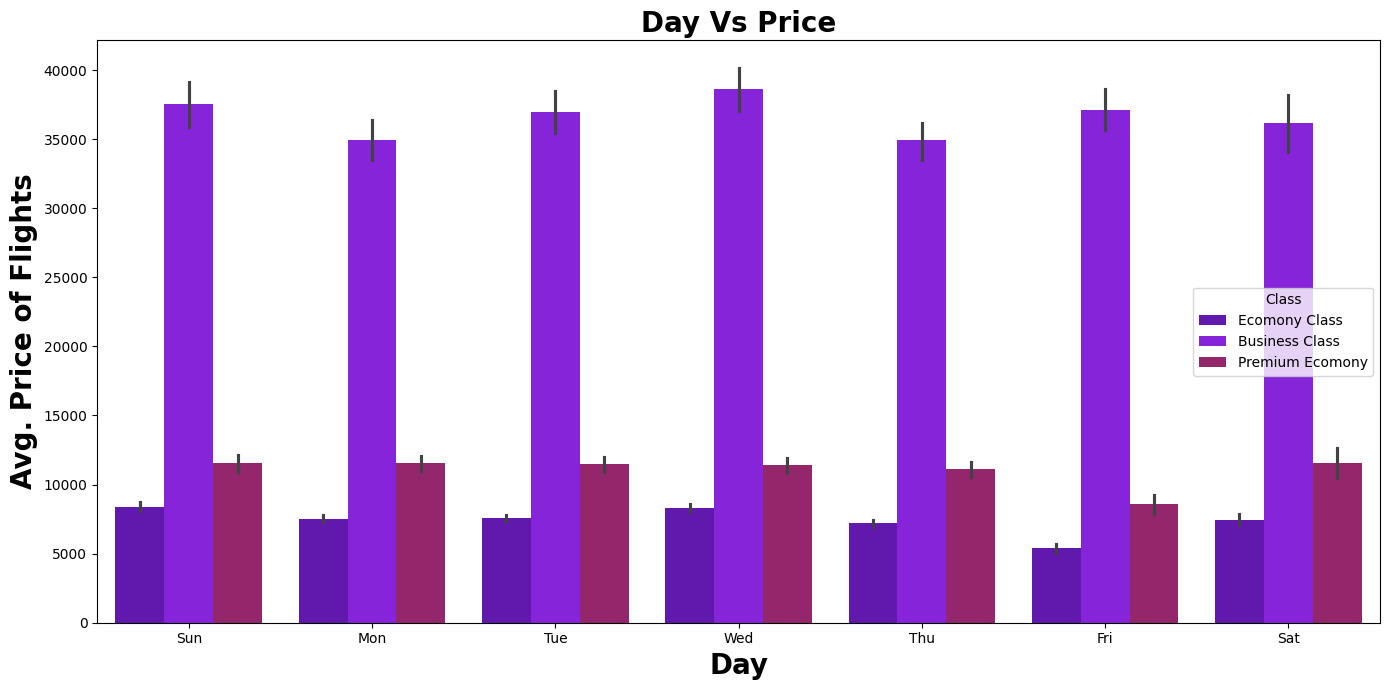

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Day'],y=df['Price'],hue=df['Class'])
plt.title("Day Vs Price",fontsize=20,fontweight ='bold')
plt.xlabel('Day',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Price of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

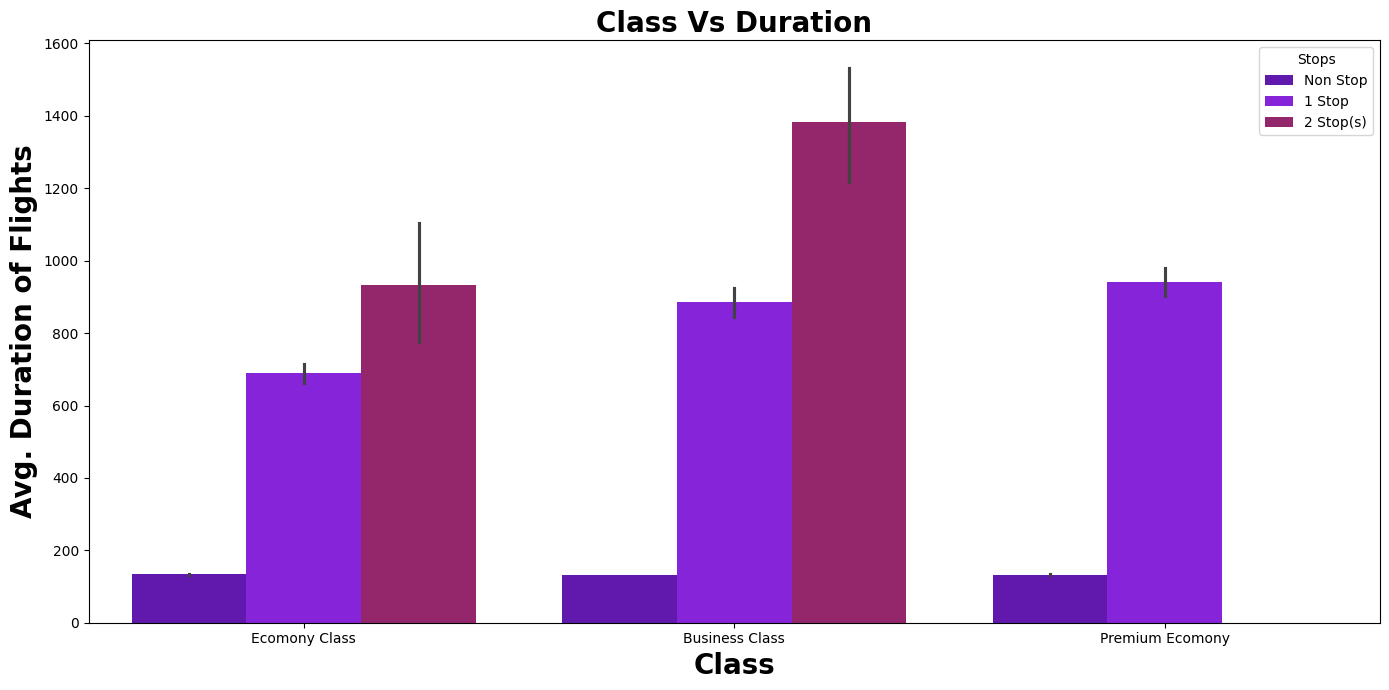

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot')
plt.figure(figsize =(14,7))
sns.barplot(x=df['Class'],y=df['Duration'],hue=df['Stops'])
plt.title("Class Vs Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Class',fontsize = 20,fontweight ='bold')
plt.ylabel('Avg. Duration of Flights',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

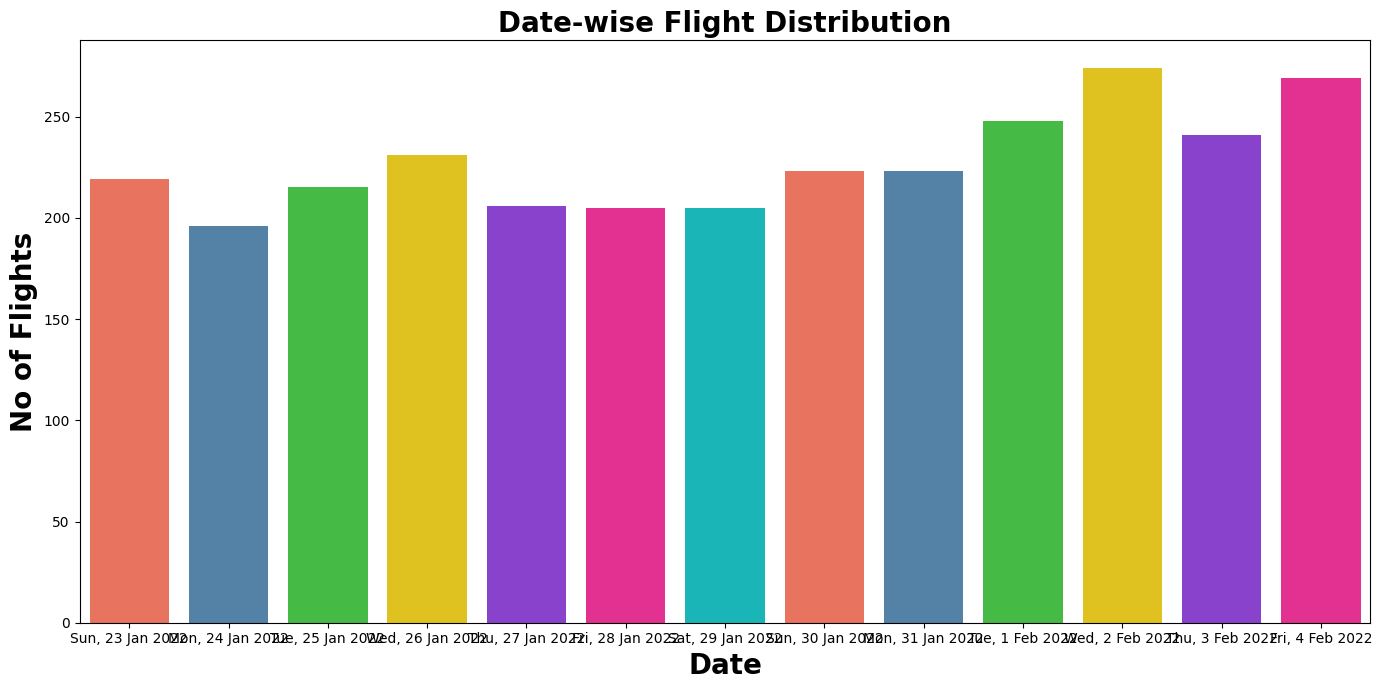

In [35]:
# Manually defined color list (make sure the number of colors matches the number of unique dates)
manual_colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#8A2BE2', '#FF1493', '#00CED1']

# Plotting the countplot with manually set colors
plt.figure(figsize=(14, 7))
sns.countplot(x='Date', data=df, palette=manual_colors)

# Titles and labels with customized font size and weight
plt.title("Date-wise Flight Distribution", fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=20, fontweight='bold')
plt.ylabel('No of Flights', fontsize=20, fontweight='bold')

# Automatically adjust the layout
plt.tight_layout()
plt.show()


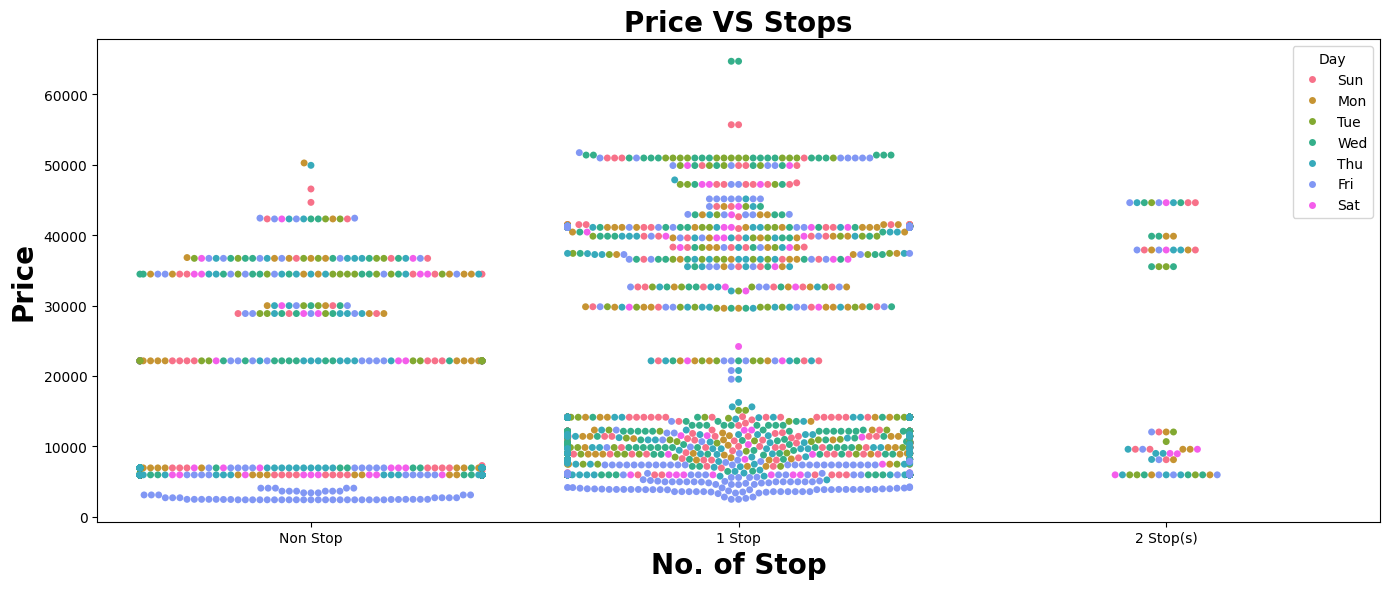

In [39]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('mako')
plt.figure(figsize =(14,6))
sns.swarmplot(y=df['Price'],x=df['Stops'], hue= df['Day'])
plt.title("Price VS Stops",fontsize=20,fontweight ='bold')
plt.xlabel('No. of Stop',fontsize = 20,fontweight ='bold')
plt.ylabel('Price',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()

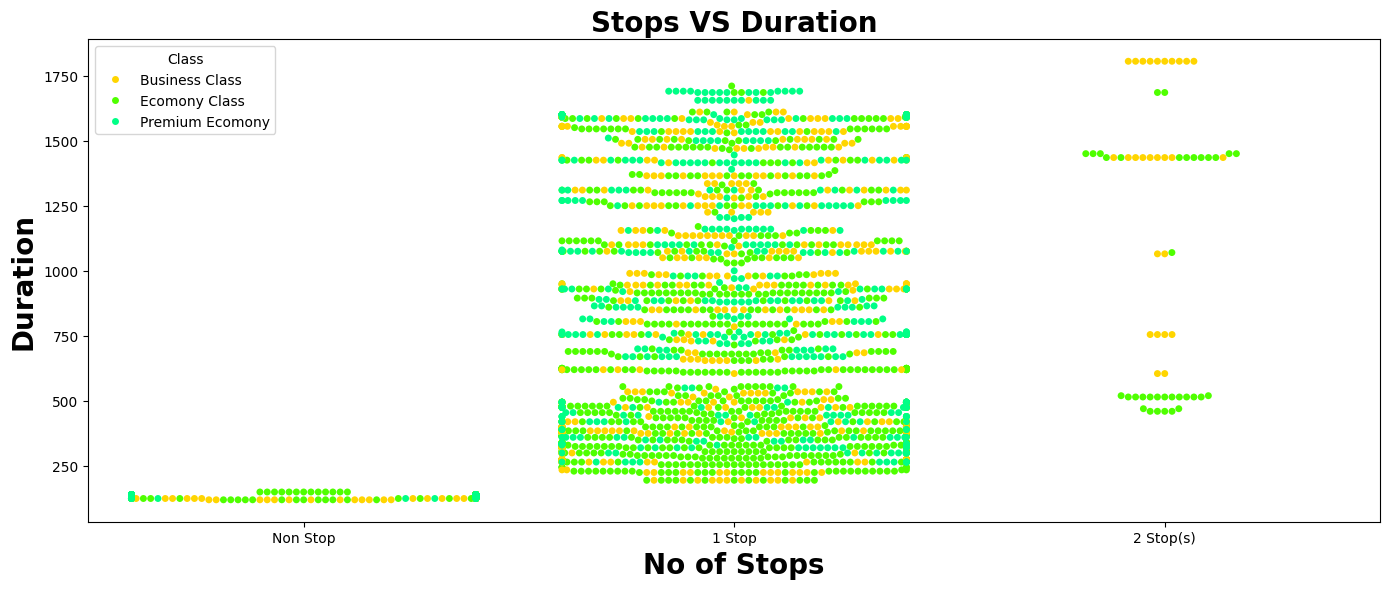

In [40]:


# Assuming df is your DataFrame and it's already loaded

plt.rcParams["figure.autolayout"] = True
sns.set_palette('hsv')

# Ensure 'Class' is treated as a categorical variable
df['Class'] = df['Class'].astype('category')

plt.figure(figsize=(14,6))

# Creating the swarm plot with stops and duration
sns.swarmplot(y=df['Duration'], x=df['Stops'], hue=df['Class'])

# Adding the title and labels
plt.title("Stops VS Duration", fontsize=20, fontweight='bold')
plt.xlabel('No of Stops', fontsize=20, fontweight='bold')
plt.ylabel('Duration', fontsize=20, fontweight='bold')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


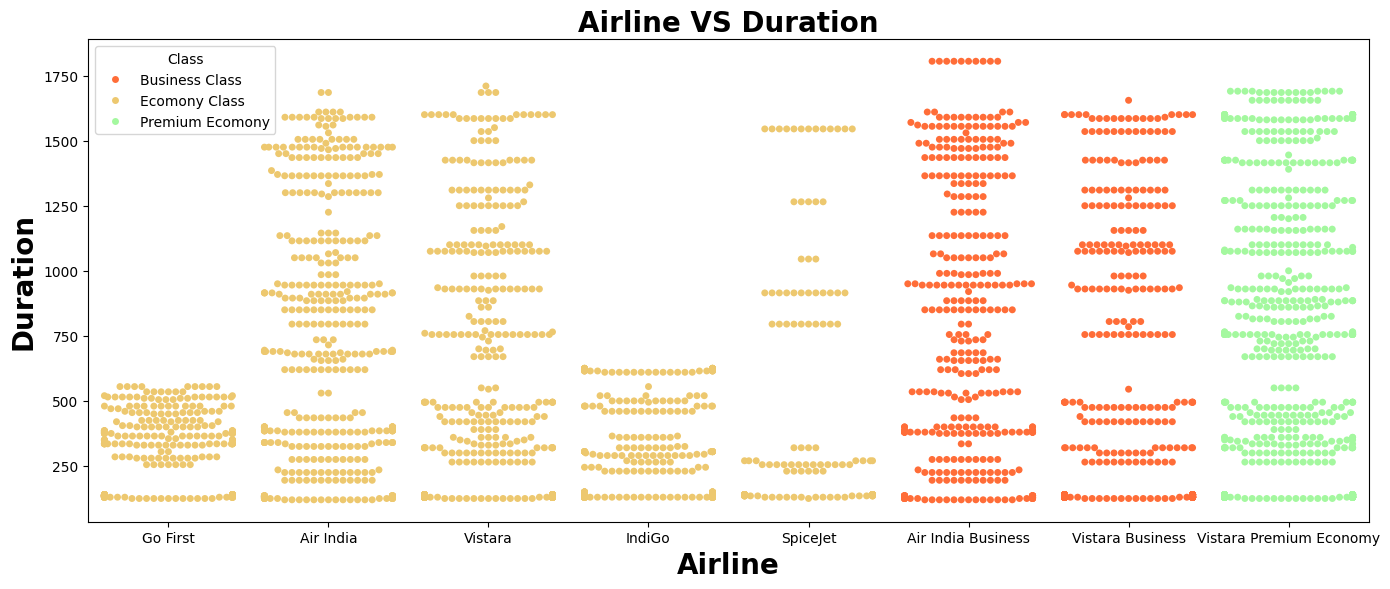

In [42]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
plt.figure(figsize =(14,6))
sns.swarmplot(x=df['Airline'],y=df['Duration'], hue =df['Class'])
plt.title("Airline VS Duration",fontsize=20,fontweight ='bold')
plt.xlabel('Airline',fontsize = 20,fontweight ='bold')
plt.ylabel('Duration',fontsize = 20,fontweight ='bold')
plt.tight_layout()
plt.show()